In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load the Dataset using Pandas

In [2]:
df = pd.read_csv("F1DriversDataset.csv")
df

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.000000,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.000000,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.000000,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.000000,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.000000,0.000000,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,Emilio Zapico,Spain,[1976],0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.000000,0.0,0.0,0.000000,0.000000,1,False
864,Zhou Guanyu,China,[2022],0.0,23.0,23.0,0.0,0.0,0.0,2.0,...,NaN,2020,0.0,1.000000,0.0,0.0,0.086957,0.260870,1,False
865,Ricardo Zonta,Brazil,"[1999, 2000, 2001, 2004, 2005]",0.0,37.0,36.0,0.0,0.0,0.0,0.0,...,NaN,2000,0.0,0.972973,0.0,0.0,0.000000,0.081081,5,False
866,Renzo Zorzi,Italy,"[1975, 1976, 1977]",0.0,7.0,7.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,1.000000,0.0,0.0,0.000000,0.142857,3,False


In [3]:
df.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False


In [4]:
df.columns

Index(['Driver', 'Nationality', 'Seasons', 'Championships', 'Race_Entries',
       'Race_Starts', 'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps',
       'Points', 'Active', 'Championship Years', 'Decade', 'Pole_Rate',
       'Start_Rate', 'Win_Rate', 'Podium_Rate', 'FastLap_Rate',
       'Points_Per_Entry', 'Years_Active', 'Champion'],
      dtype='object')

In [5]:
df.shape

(868, 22)

## Checking the nationality of the Drivers 

In [6]:
nationality_drivers = df['Nationality'].value_counts().sort_values(ascending=False).head(20)
nationality_drivers

Nationality
United Kingdom    164
United States     160
Italy              99
France             72
West Germany       39
Brazil             32
Argentina          25
Switzerland        24
Belgium            23
South Africa       23
Japan              21
Australia          18
Austria            16
Netherlands        16
Spain              15
Canada             15
Germany            14
Sweden             11
Finland             9
New Zealand         9
Name: count, dtype: int64

### Distribution of drivers' nationalities

In [7]:

def generate_chart(names, values):
    df = px.data.tips() 
    fig = px.pie(df, values=values, names=names, color_discrete_sequence=px.colors.sequential.RdBu)
    return fig

generate_chart(nationality_drivers.index,nationality_drivers.values)

We can say that there are more drivers from the United Kingdom than the United states.



## The correlation between the number of seasons a driver participates in and their number of race wins

In [8]:
df_winsvsyears = df[['Years_Active','Race_Wins']]
df_winsvsyears.head()

,Years_Active,Race_Wins
0,2,0.0
1,2,0.0
2,2,0.0
3,5,0.0
4,1,0.0


In [9]:
df_winsvsyears.isnull().sum()

Years_Active    0
Race_Wins       0
dtype: int64

In [10]:
X= df_winsvsyears['Years_Active'].to_numpy().reshape(-1,1)
y = df_winsvsyears['Race_Wins'].to_numpy().reshape(-1,1).ravel()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=None)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [12]:
corr_coef = df['Years_Active'].corr(df['Race_Wins'])
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("corr coef",corr_coef)

Mean Squared Error:  21.757768045845392
corr coef 0.5037167768266376


checking other parameters

## Pole positions vs Race wins of champions

In [13]:

df_champions = df.query('Championships > 0')
df_champions.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
17,Fernando Alonso,Spain,"[2001, 2003, 2004, 2005, 2006, 2007, 2008, 200...",2.0,359.0,356.0,22.0,32.0,99.0,23.0,...,"[2005, 2006]",2010,0.061281,0.991643,0.089136,0.275766,0.064067,5.782730,19,True
25,Mario Andretti,United States,"[1968, 1969, 1970, 1971, 1972, 1974, 1975, 197...",1.0,131.0,128.0,18.0,12.0,19.0,10.0,...,[1978],1980,0.137405,0.977099,0.091603,0.145038,0.076336,1.374046,14,True
35,Alberto Ascari,Italy,"[1950, 1951, 1952, 1953, 1954, 1955]",2.0,33.0,32.0,14.0,13.0,17.0,12.0,...,"[1952, 1953]",1950,0.424242,0.969697,0.393939,0.515152,0.363636,3.261818,6,True
107,Jack Brabham,Australia,"[1955, 1956, 1957, 1958, 1959, 1960, 1961, 196...",3.0,128.0,126.0,13.0,14.0,31.0,12.0,...,"[1959, 1960, 1966]",1960,0.101562,0.984375,0.109375,0.242188,0.093750,1.976562,16,True
135,Jenson Button,United Kingdom,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",1.0,309.0,306.0,8.0,15.0,50.0,8.0,...,[2009],2010,0.025890,0.990291,0.048544,0.161812,0.025890,3.996764,18,True


In [14]:
df_champions.isnull().sum()


Driver                0
Nationality           0
Seasons               0
Championships         0
Race_Entries          0
Race_Starts           0
Pole_Positions        0
Race_Wins             0
Podiums               0
Fastest_Laps          0
Points                0
Active                0
Championship Years    0
Decade                0
Pole_Rate             0
Start_Rate            0
Win_Rate              0
Podium_Rate           0
FastLap_Rate          0
Points_Per_Entry      0
Years_Active          0
Champion              0
dtype: int64

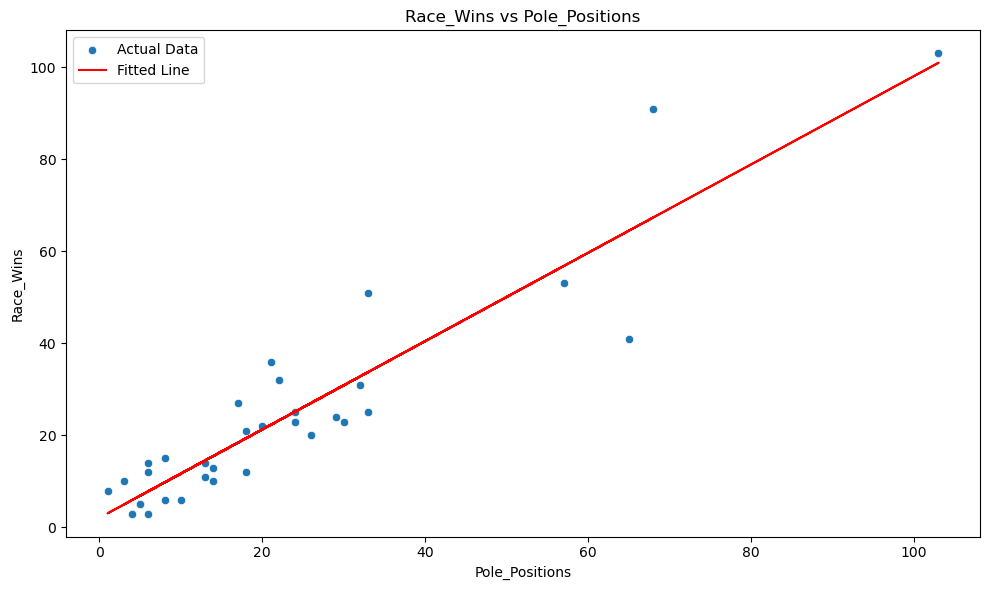

Prediction Score: 68.33930367927572
Correlation Coefficient: 0.9280326627611925
R-squared: 0.8612446231516298


In [15]:
from sklearn.metrics import mean_squared_error
def linear_regression(df, predictor, target):
    X = df[predictor].values.reshape(-1, 1)
    y = df[target].values.reshape(-1, 1)
    
    regressor = LinearRegression()
    regressor.fit(X, y)
    
    r_squared = regressor.score(X, y)
    
    # Calculate correlation coefficient
    corr_coef = df[predictor].corr(df[target])
    
    y_pred = regressor.predict(X)
    
    prediction_score = mean_squared_error(y, y_pred)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=predictor, y=target, data=df, label='Actual Data')
    plt.plot(df[predictor], y_pred, color='red', label='Fitted Line')
    plt.xlabel(predictor)
    plt.ylabel(target)
    plt.title(f'{target} vs {predictor}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return corr_coef, r_squared, y_pred, prediction_score

corr_coef, r_squared, y_pred, prediction_score = linear_regression(df_champions, 'Pole_Positions', 'Race_Wins')

print('Prediction Score:', prediction_score)
print('Correlation Coefficient:', corr_coef)
print('R-squared:', r_squared)


the pole position is a very good predictor of race wins for champions, and that a higher pole position is generally associated with a higher number of race wins.

Non-numeric columns: Index(['Driver', 'Nationality', 'Seasons', 'Championship Years'], dtype='object')
                  Championships  Race_Entries  Race_Starts  Pole_Positions  \
Championships          1.000000      0.462985     0.471073        0.869342   
Race_Entries           0.462985      1.000000     0.996701        0.582264   
Race_Starts            0.471073      0.996701     1.000000        0.591793   
Pole_Positions         0.869342      0.582264     0.591793        1.000000   
Race_Wins              0.915247      0.590658     0.600889        0.954951   
Podiums                0.808274      0.757007     0.768449        0.901514   
Fastest_Laps           0.829641      0.681107     0.691432        0.899697   
Points                 0.655567      0.689361     0.701817        0.799746   
Decade                 0.105263      0.498214     0.489603        0.181147   
Pole_Rate              0.675121      0.360392     0.367880        0.724572   
Start_Rate             0.101046      0.

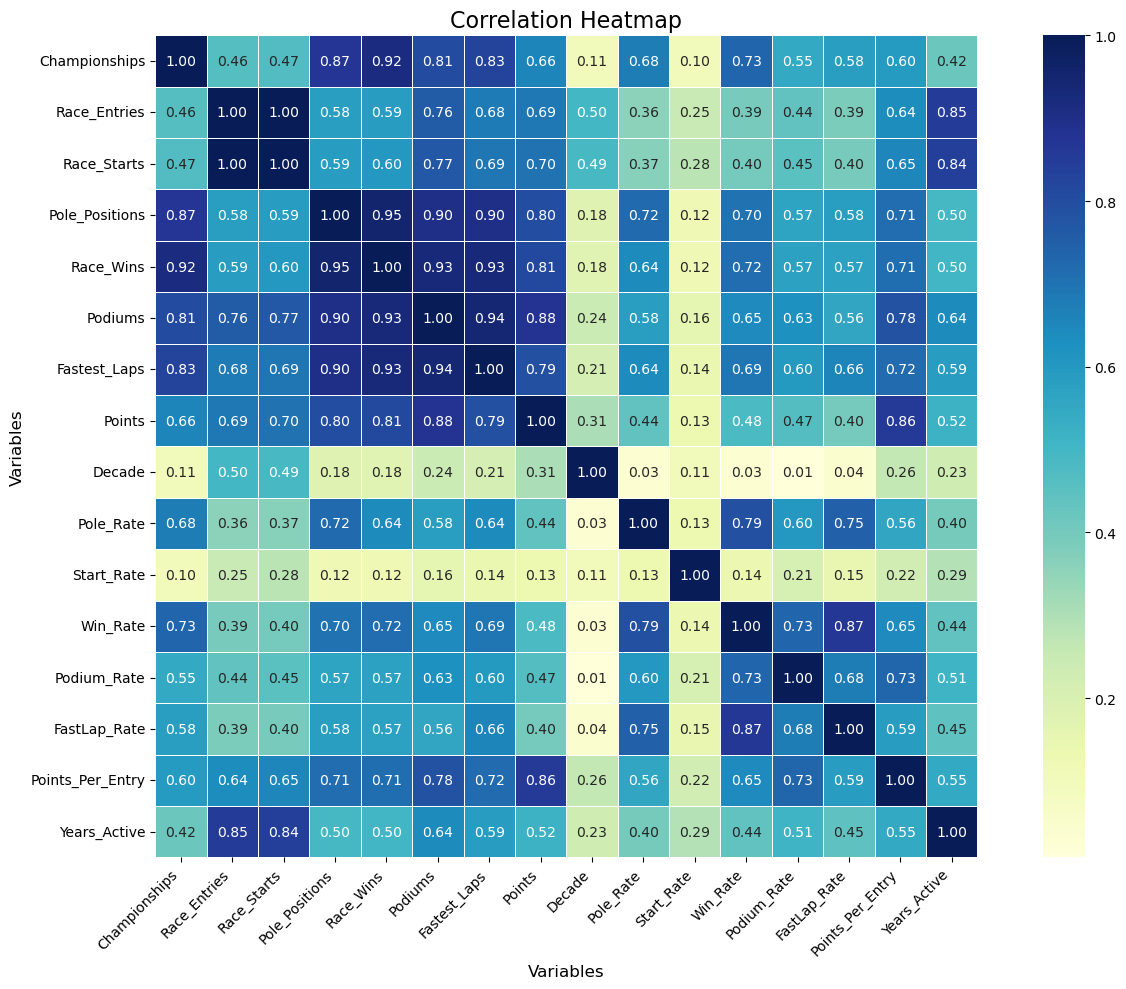

In [16]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


# Exclude non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Calculate and print the correlation matrix
corr_matrix = df_numeric.corr()
print(corr_matrix)

# Create the heatmap
plt.figure(figsize=(14, 10))  # Adjusted size for better readability
heatmap = sns.heatmap(
    corr_matrix, 
    cmap="YlGnBu",  # Colormap
    annot=True,     # Show the correlation values
    annot_kws={'size': 10},  # Adjust font size of annotations
    fmt=".2f",      # Format of the annotation text
    linewidths=0.5, # Add grid lines
    cbar=True,      # Show color bar
    square=True,    # Keep cells square
    xticklabels=df_numeric.columns,  # Use numeric column names for x-axis
    yticklabels=df_numeric.columns   # Use numeric column names for y-axis
)

# Set plot labels and title
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better fit
plt.yticks(rotation=0)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

Corr Graphs


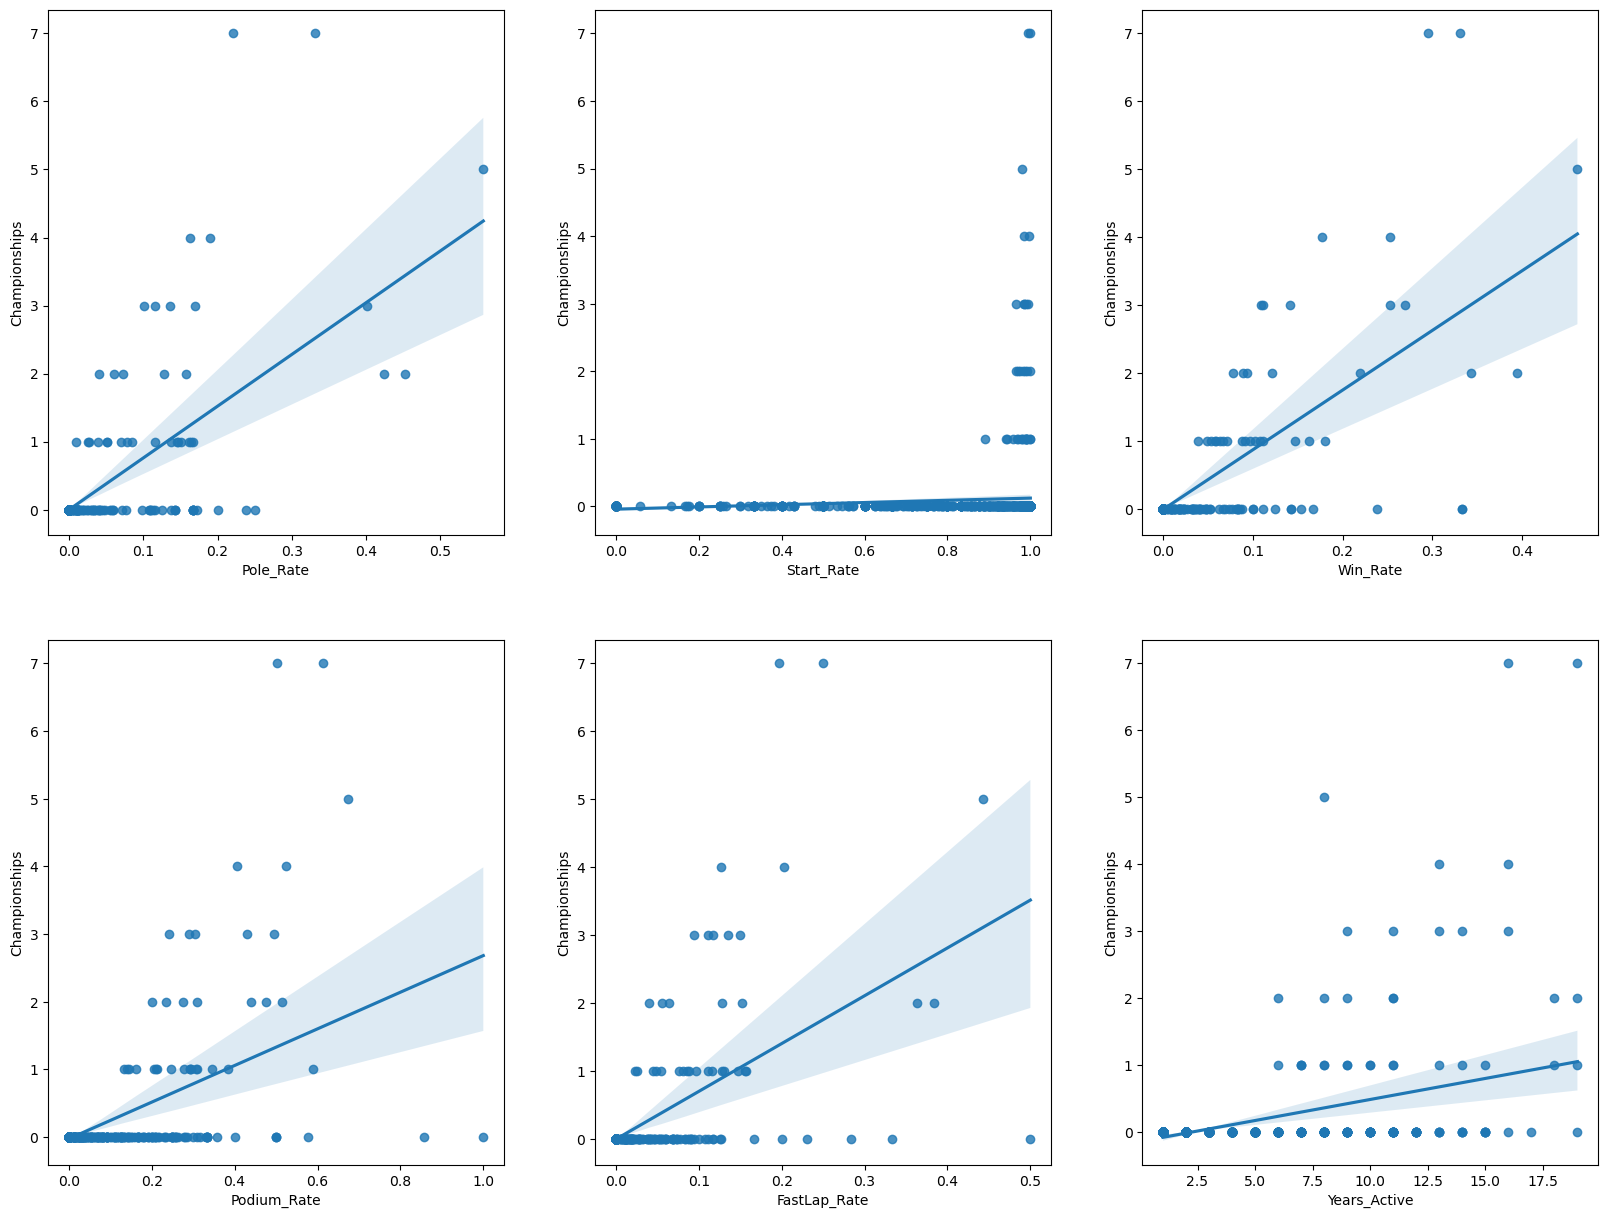

In [17]:
columns=['Pole_Rate','Start_Rate','Win_Rate','Podium_Rate','FastLap_Rate','Years_Active']
plt.figure(figsize=(20, 15))
i=0
for col in columns:
    i=i+1
    plt.subplot(2,3,i)
    sns.regplot(x = col, y = 'Championships', data = df,order=1)
plt.show()

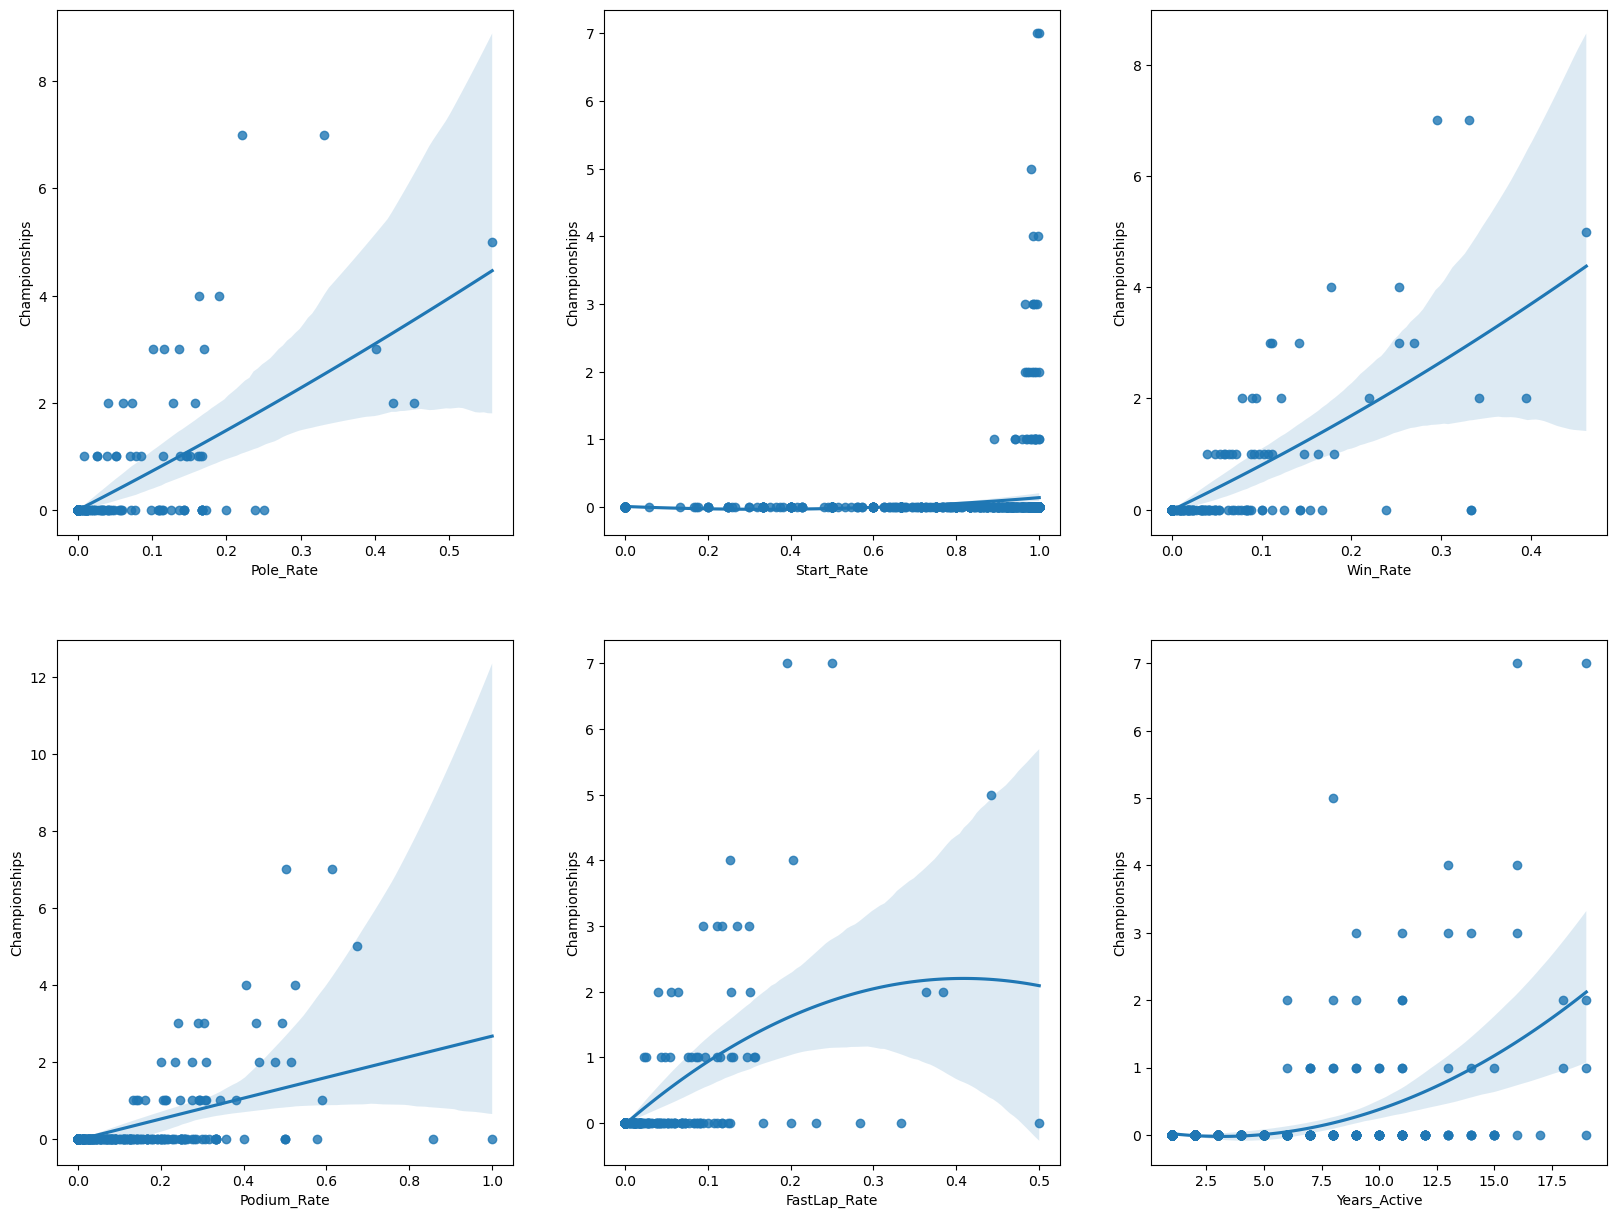

In [18]:
columns=['Pole_Rate','Start_Rate','Win_Rate','Podium_Rate','FastLap_Rate','Years_Active']
plt.figure(figsize=(20, 15))
i=0
for col in columns:
    i=i+1
    plt.subplot(2,3,i)
    sns.regplot(x = col, y = 'Championships', data = df,order=2)
plt.show()

## Binary Classification

In [19]:
target = df['Champion']
features = df[['Race_Entries',
       'Race_Starts', 'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps',
       'Points']]
X= features.values
Y=target.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
 # Always scale the input. The most convenient way is to use a pipeline.
clf = SGDClassifier(random_state=42)

model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred,average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)


Accuracy: 0.9885057471264368
Precision: 0.9940828402366864


[[167   0]
 [  2   5]]


<Axes: >

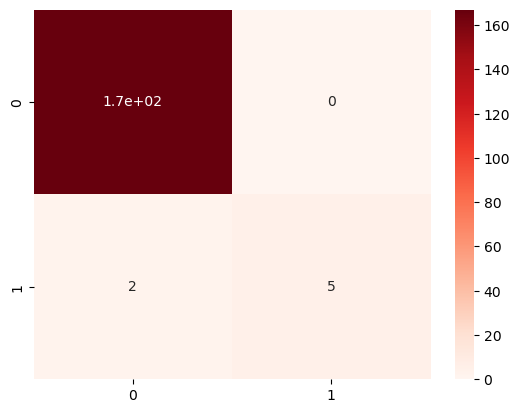

In [20]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
sns.heatmap(matrix, annot=True, cmap='Reds')

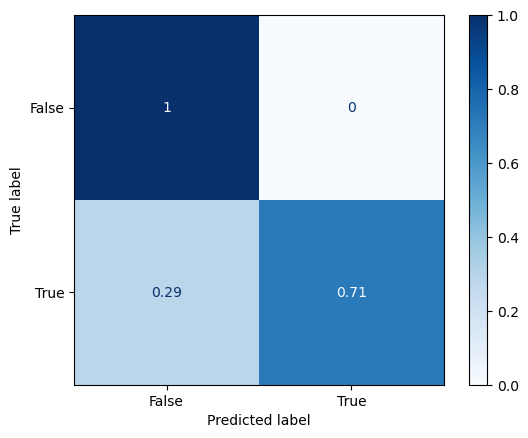

In [21]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,cmap=plt.cm.Blues, normalize='true')


### Based on the analysis of the heatmap of the confusion matrix and the normalized confusion matrix, the SGDClassifier demonstrates a strong ability to predict whether an individual is likely to become a Champion using features such as Race_Entries, Race_Starts, Pole_Positions, Race_Wins, Podiums, Fastest_Laps, and Points. The model exhibits high accuracy and a low false negative rate, suggesting it effectively identifies most potential champions while only occasionally misclassifying non-champions. However, due to the inherent unpredictability of F1 races, we cannot definitively claim that this model provides the optimal classification method.